In [15]:
import tensorflow as tf
import os
import cv2
from tqdm import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D, BatchNormalization, Flatten

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import PIL
import PIL.Image

In [17]:
test_loc='C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//val'
train_loc='C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//train'

In [18]:
import tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size = (96, 96)
batch_size = 10

train_dataset = image_dataset_from_directory(train_loc,
                                             batch_size=batch_size,
                                             image_size=image_size,
                                             validation_split=0.2,
                                             subset="training",
                                             shuffle=True,
                                             seed=42)

test_dataset = image_dataset_from_directory(test_loc,
                                            batch_size=batch_size,
                                            image_size=image_size,
                                            shuffle=True,
                                            seed=42)

Found 8863 files belonging to 2 classes.
Using 7091 files for training.
Found 600 files belonging to 2 classes.


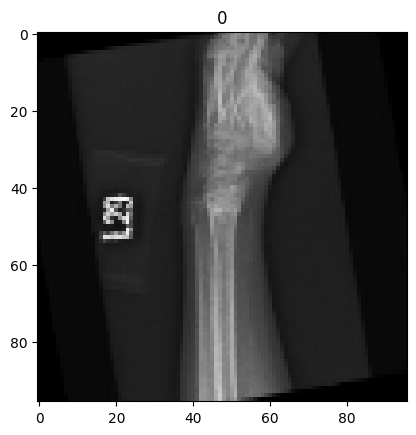

In [19]:
for images, labels in train_dataset.take(1):
    random_idx = random.randint(0, batch_size - 1)
    random_image = images[random_idx]
    random_label = labels[random_idx]

    plt.imshow(random_image.numpy().astype("uint8"))
    plt.title(random_label.numpy())
    plt.show()

In [20]:
#START

Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.5087 - loss: 0.7731

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


222/222 ━━━━━━━━━━━━━━━━━━━━ 161s 708ms/step - accuracy: 0.5087 - loss: 0.7728 - val_accuracy: 0.5406 - val_loss: 0.6866
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 151s 678ms/step - accuracy: 0.5462 - loss: 0.6843 - val_accuracy: 0.5463 - val_loss: 0.6803
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 150s 673ms/step - accuracy: 0.5800 - loss: 0.6693 - val_accuracy: 0.5056 - val_loss: 0.6980
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 152s 682ms/step - accuracy: 0.5808 - loss: 0.6667 - val_accuracy: 0.5767 - val_loss: 0.6867
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 161s 722ms/step - accuracy: 0.6163 - loss: 0.6505 - val_accuracy: 0.4870 - val_loss: 0.6999
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 162s 727ms/step - accuracy: 0.6371 - loss: 0.6372 - val_accuracy: 0.4915 - val_loss: 0.7134
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 162s 726ms/step - accuracy: 0.6397 - loss: 0.6380 - val_accuracy: 0.4752 - val_loss: 0.7210
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 161s 722ms/step - accuracy: 0.6447 - loss: 0.62

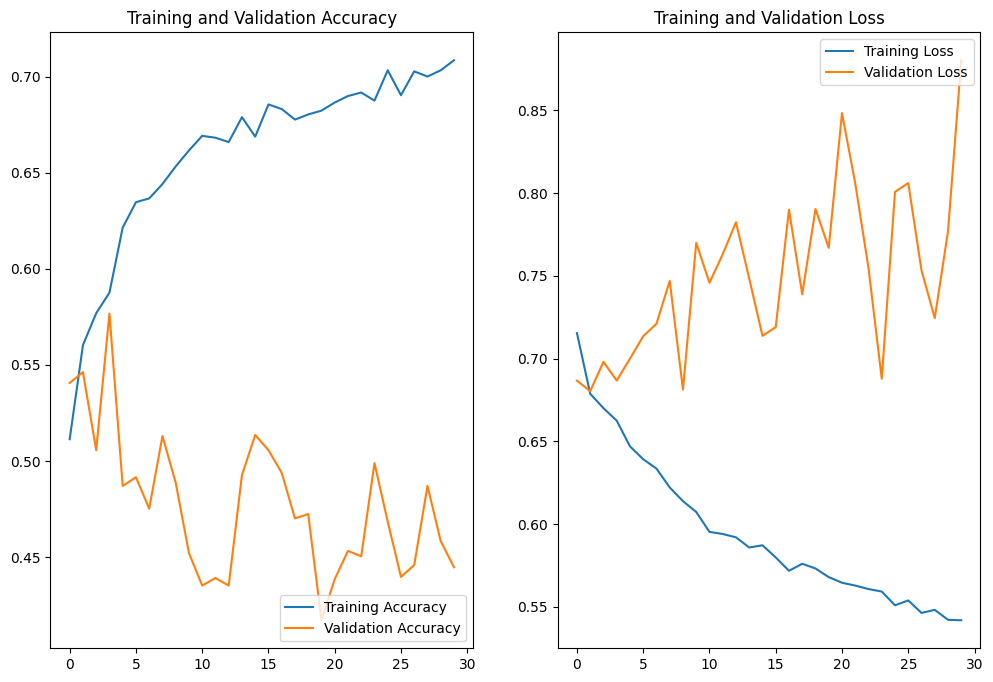

56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step
               precision    recall  f1-score   support

    fractured       0.49      0.44      0.46       896
not fractured       0.48      0.53      0.50       876

     accuracy                           0.48      1772
    macro avg       0.48      0.48      0.48      1772
 weighted avg       0.48      0.48      0.48      1772



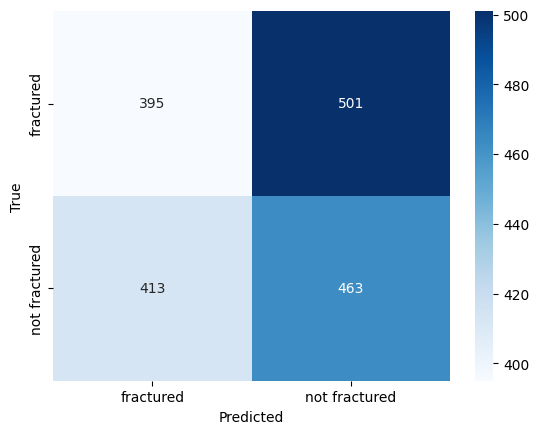

In [21]:
#Perciever Model
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

#Perciever new
def build_perceiver(input_shape=(128, 128, 3), num_classes=1):
    inputs = Input(shape=input_shape)
    x = inputs
    x = Flatten()(x)

    x = Dense(1024, activation='relu')(x)
    x = LayerNormalization()(x)
    x = Dense(512, activation='relu')(x)
    x = LayerNormalization()(x)
    x = Dense(216, activation='relu')(x)
    x = LayerNormalization()(x)

    # Classification head
    outputs = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

def train_model(model, train_generator, validation_generator, epochs=30):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
    
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,validation_steps=validation_generator.samples,
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    validation_generator.reset()
    predictions = model.predict(validation_generator)
    y_pred = (predictions > 0.5).astype(int)
    y_true = validation_generator.classes

    print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def main():
    train_dir = 'C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//train'
    validation_dir = 'C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_perceiver()

    epochs = 30
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/30


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.5146 - loss: 0.7044

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


222/222 ━━━━━━━━━━━━━━━━━━━━ 157s 664ms/step - accuracy: 0.5146 - loss: 0.7044 - val_accuracy: 0.5040 - val_loss: 0.6942
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 146s 652ms/step - accuracy: 0.5122 - loss: 0.6904 - val_accuracy: 0.5113 - val_loss: 0.6884
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 146s 655ms/step - accuracy: 0.5688 - loss: 0.6703 - val_accuracy: 0.5186 - val_loss: 0.6887
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 145s 651ms/step - accuracy: 0.5535 - loss: 0.6708 - val_accuracy: 0.4797 - val_loss: 0.6852
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 146s 653ms/step - accuracy: 0.5656 - loss: 0.6713 - val_accuracy: 0.4786 - val_loss: 0.8076
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 145s 650ms/step - accuracy: 0.5694 - loss: 0.6698 - val_accuracy: 0.4859 - val_loss: 0.8028
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 145s 650ms/step - accuracy: 0.5903 - loss: 0.6576 - val_accuracy: 0.5147 - val_loss: 0.6898
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 145s 651ms/step - accuracy: 0.5817 - loss: 0.66

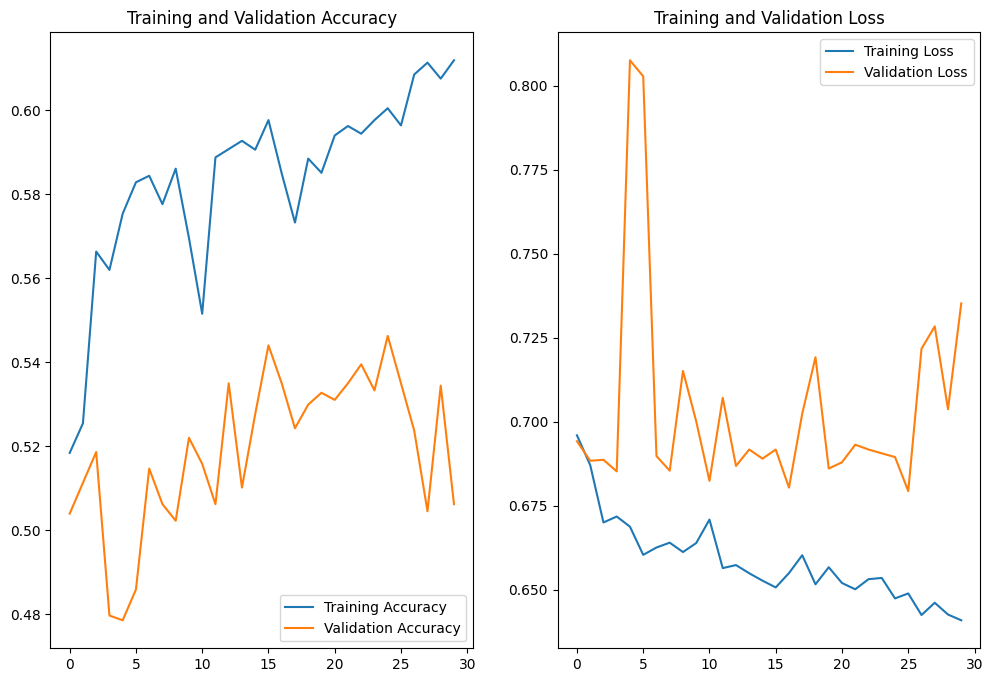

56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 527ms/step
               precision    recall  f1-score   support

    fractured       0.53      0.37      0.44       896
not fractured       0.51      0.66      0.57       876

     accuracy                           0.52      1772
    macro avg       0.52      0.52      0.51      1772
 weighted avg       0.52      0.52      0.50      1772



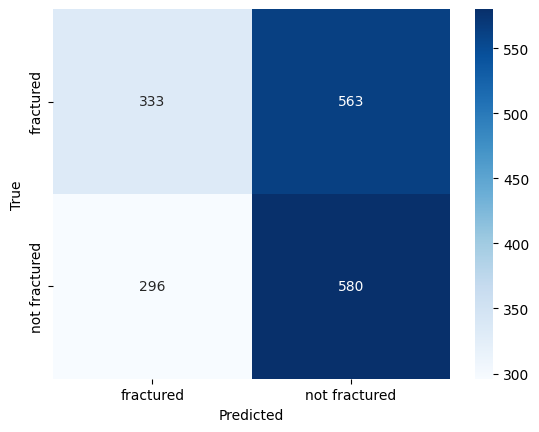

In [22]:
#ResNet Model
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import ResNet50

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_resnet_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = ResNet50(input_shape=input_shape,
                          include_top=False,
                          weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def train_model(model, train_generator, validation_generator, epochs=30):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,validation_steps=validation_generator.samples,
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    validation_generator.reset()
    predictions = model.predict(validation_generator)
    y_pred = (predictions > 0.5).astype(int)
    y_true = validation_generator.classes

    print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def main():
    train_dir = 'C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//train'
    validation_dir = 'C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_resnet_model()

    epochs = 30
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/30


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 951ms/step - accuracy: 0.5883 - loss: 0.6743

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


222/222 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.5886 - loss: 0.6740 - val_accuracy: 0.4616 - val_loss: 0.8688
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.7535 - loss: 0.5104 - val_accuracy: 0.4949 - val_loss: 0.9302
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7821 - loss: 0.4465 - val_accuracy: 0.5508 - val_loss: 0.8495
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.8135 - loss: 0.4002 - val_accuracy: 0.5508 - val_loss: 1.0511
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.8313 - loss: 0.3730 - val_accuracy: 0.5378 - val_loss: 1.0107
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.8533 - loss: 0.3381 - val_accuracy: 0.6202 - val_loss: 0.9721
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.8570 - loss: 0.3288 - val_accuracy: 0.5655 - val_loss: 1.0169
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.8640 - loss: 0.3002 - val_accuracy: 0.540

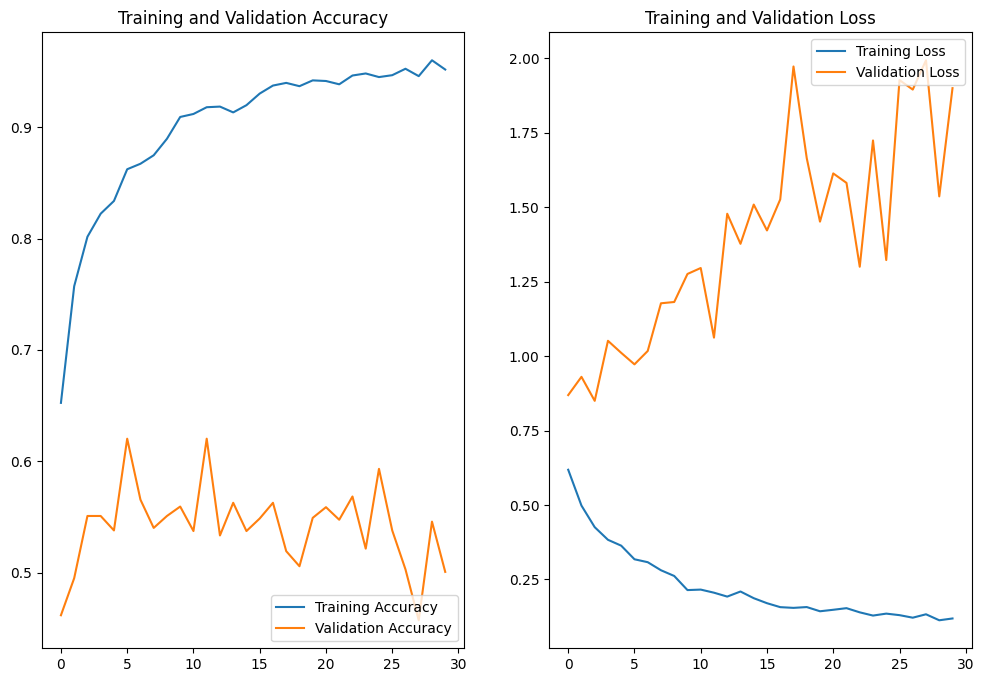

56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 903ms/step
               precision    recall  f1-score   support

    fractured       0.52      0.60      0.56       896
not fractured       0.52      0.44      0.48       876

     accuracy                           0.52      1772
    macro avg       0.52      0.52      0.52      1772
 weighted avg       0.52      0.52      0.52      1772



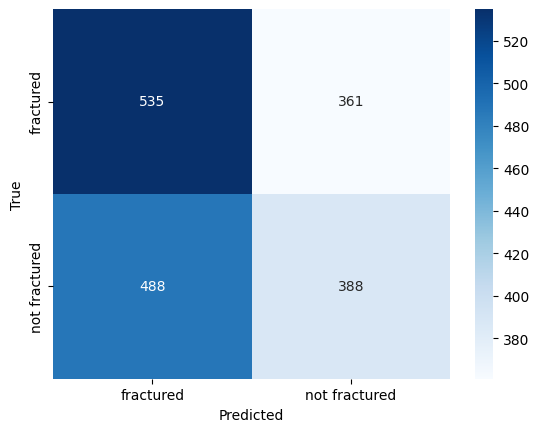

In [23]:
#VGG16 model
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_vgg16_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = VGG16(input_shape=input_shape,
                       include_top=False,
                       weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)  # Moved dense layer with 1024 units before others
    x = Dense(512, activation='relu')(x)    # Moved dense layer with 512 units after 1024 units
    x = Dense(256, activation='relu')(x)    # Moved dense layer with 256 units after 512 units
    predictions = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def train_model(model, train_generator, validation_generator, epochs=30):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,validation_steps=validation_generator.samples,
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    validation_generator.reset()
    predictions = model.predict(validation_generator)
    y_pred = (predictions > 0.5).astype(int)
    y_true = validation_generator.classes

    print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def main():
    train_dir = 'C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//train'
    validation_dir = 'C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_vgg16_model()

    epochs = 30
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/30


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.6575 - loss: 0.6342
Epoch 1: val_accuracy improved from -inf to 0.62246, saving model to best_model.keras


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


222/222 ━━━━━━━━━━━━━━━━━━━━ 174s 762ms/step - accuracy: 0.6578 - loss: 0.6339 - val_accuracy: 0.6225 - val_loss: 0.7179
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.7873 - loss: 0.4497
Epoch 2: val_accuracy improved from 0.62246 to 0.62528, saving model to best_model.keras
222/222 ━━━━━━━━━━━━━━━━━━━━ 168s 754ms/step - accuracy: 0.7874 - loss: 0.4496 - val_accuracy: 0.6253 - val_loss: 0.7550
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.8244 - loss: 0.3928
Epoch 3: val_accuracy improved from 0.62528 to 0.64108, saving model to best_model.keras
222/222 ━━━━━━━━━━━━━━━━━━━━ 168s 753ms/step - accuracy: 0.8244 - loss: 0.3928 - val_accuracy: 0.6411 - val_loss: 0.7431
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.8504 - loss: 0.3457
Epoch 4: val_accuracy did not improve from 0.64108
222/222 ━━━━━━━━━━━━━━━━━━━━ 168s 751ms/step - accuracy: 0.8504 - loss: 0.3456 - val_accuracy: 0.6400 - val_loss: 0.8363
Epoch 5/30
222/222 ━━━━

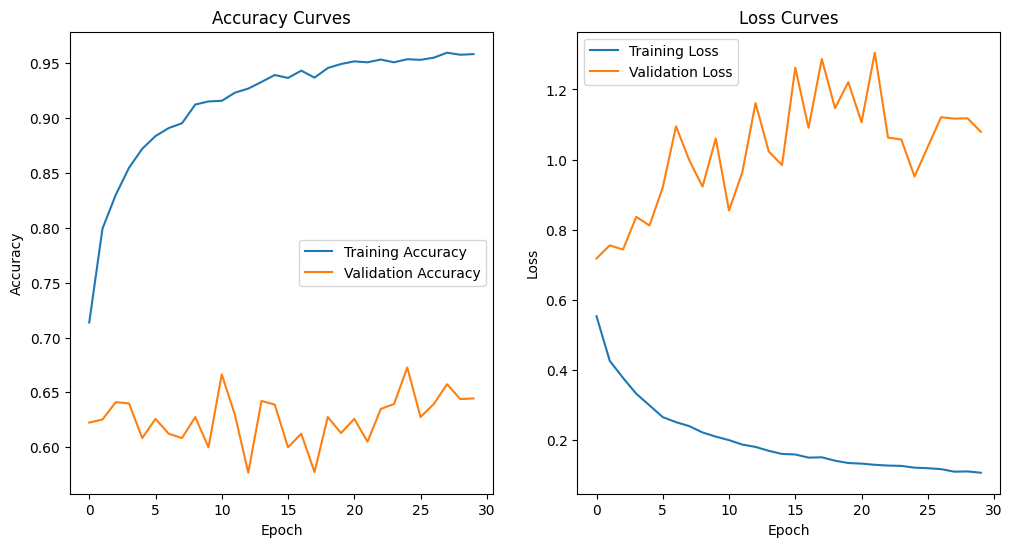

56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 591ms/step
Classification Report for Validation Dataset:
              precision    recall  f1-score   support

           0       0.51      0.57      0.54       896
           1       0.51      0.45      0.47       876

    accuracy                           0.51      1772
   macro avg       0.51      0.51      0.51      1772
weighted avg       0.51      0.51      0.51      1772



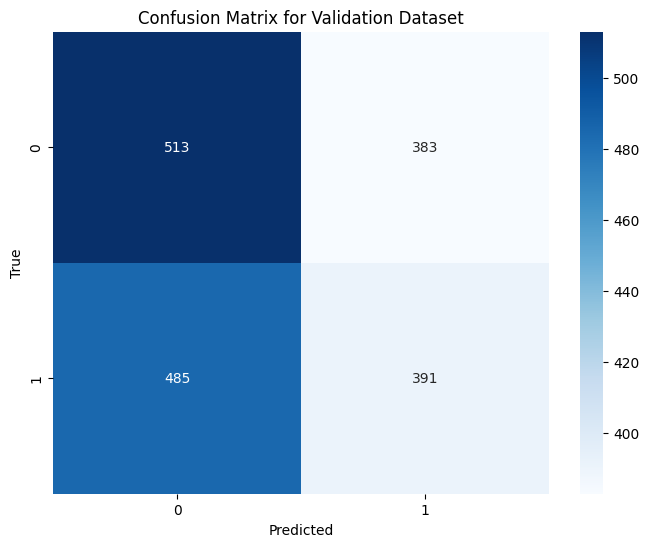

In [24]:
#Xception model - base model
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import Xception

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_xception_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = Xception(input_shape=input_shape,
                          include_top=False,
                          weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)  # Changed the order of dense layers
    x = Dense(256, activation='relu')(x)   # Changed the order of dense layers
    x = Dense(128, activation='relu')(x)   # Changed the order of dense layers
    predictions = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model
    
def train_model(model, train_generator, validation_generator, epochs=10):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,validation_steps=validation_generator.samples,
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    predictions = model.predict(validation_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = validation_generator.classes[:len(y_pred)]

    print("Classification Report for Validation Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Validation Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()
# Define train_model, evaluate_model, plot_metrics functions as in the previous example

def main():
    train_dir = 'C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//train'
    validation_dir = 'C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_xception_model()

    epochs = 30
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/30


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.6540 - loss: 0.6607

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


222/222 ━━━━━━━━━━━━━━━━━━━━ 164s 690ms/step - accuracy: 0.6544 - loss: 0.6601 - val_accuracy: 0.5734 - val_loss: 0.9095
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 150s 673ms/step - accuracy: 0.8206 - loss: 0.4030 - val_accuracy: 0.5875 - val_loss: 0.9756
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 150s 670ms/step - accuracy: 0.8609 - loss: 0.3107 - val_accuracy: 0.5226 - val_loss: 1.0038
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 151s 676ms/step - accuracy: 0.8867 - loss: 0.2650 - val_accuracy: 0.6038 - val_loss: 1.0178
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 151s 677ms/step - accuracy: 0.9126 - loss: 0.2121 - val_accuracy: 0.5897 - val_loss: 1.0427
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 151s 677ms/step - accuracy: 0.9117 - loss: 0.2079 - val_accuracy: 0.5621 - val_loss: 1.4951
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 151s 676ms/step - accuracy: 0.9382 - loss: 0.1643 - val_accuracy: 0.5942 - val_loss: 1.1968
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 151s 679ms/step - accuracy: 0.9447 - loss: 0.13

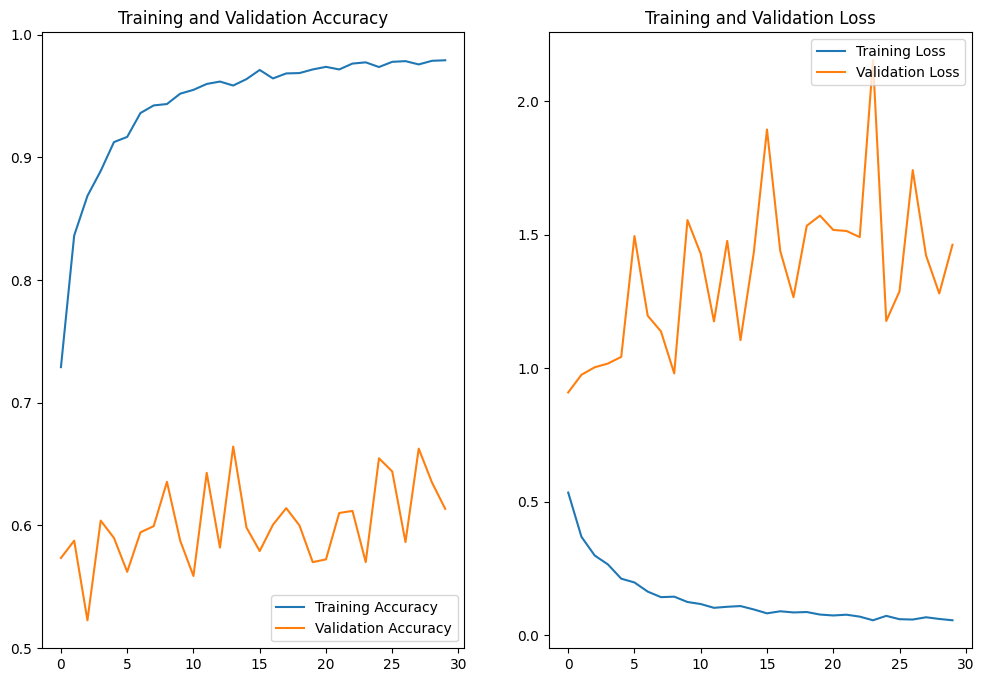

56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 574ms/step
               precision    recall  f1-score   support

    fractured       0.51      0.56      0.54       896
not fractured       0.50      0.45      0.48       876

     accuracy                           0.51      1772
    macro avg       0.51      0.51      0.51      1772
 weighted avg       0.51      0.51      0.51      1772



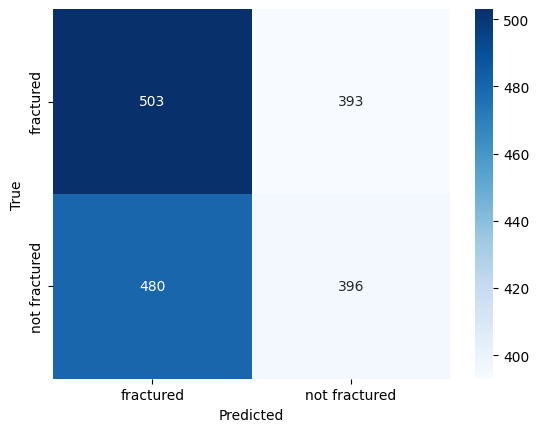

In [25]:
#Densetnet21 Model
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import DenseNet121

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_densenet_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = DenseNet121(input_shape=input_shape,
                             include_top=False,
                             weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def train_model(model, train_generator, validation_generator, epochs=30):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,validation_steps=validation_generator.samples,
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    validation_generator.reset()
    predictions = model.predict(validation_generator)
    y_pred = (predictions > 0.5).astype(int)
    y_true = validation_generator.classes

    print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def main():
    train_dir ='C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//train'
    validation_dir ='C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_densenet_model()

    epochs = 30
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()

Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/30


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.5856 - loss: 0.8181

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


222/222 ━━━━━━━━━━━━━━━━━━━━ 88s 369ms/step - accuracy: 0.5859 - loss: 0.8174 - val_accuracy: 0.5277 - val_loss: 0.8386
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 81s 359ms/step - accuracy: 0.7025 - loss: 0.5631 - val_accuracy: 0.5530 - val_loss: 0.8141
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 80s 355ms/step - accuracy: 0.7578 - loss: 0.4866 - val_accuracy: 0.5339 - val_loss: 0.9440
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 80s 357ms/step - accuracy: 0.7803 - loss: 0.4557 - val_accuracy: 0.6010 - val_loss: 0.7725
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 80s 355ms/step - accuracy: 0.7969 - loss: 0.4358 - val_accuracy: 0.5830 - val_loss: 0.7708
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 80s 356ms/step - accuracy: 0.8162 - loss: 0.4036 - val_accuracy: 0.5581 - val_loss: 0.8610
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 79s 354ms/step - accuracy: 0.8262 - loss: 0.3758 - val_accuracy: 0.5841 - val_loss: 0.8520
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 80s 358ms/step - accuracy: 0.8416 - loss: 0.3567 - val

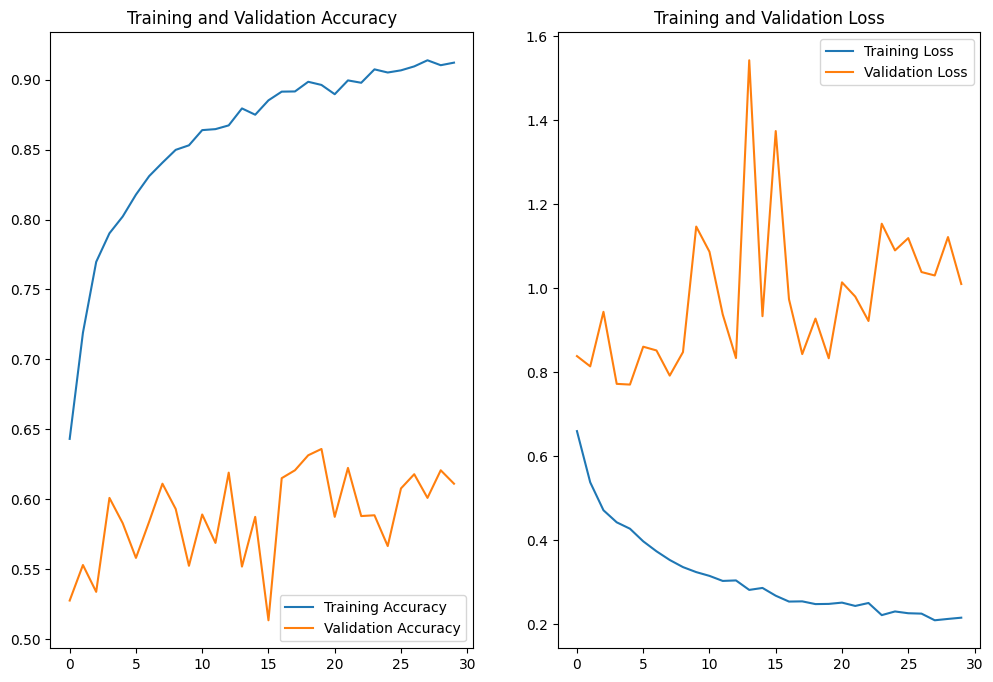

56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step
               precision    recall  f1-score   support

    fractured       0.48      0.52      0.50       896
not fractured       0.46      0.43      0.44       876

     accuracy                           0.47      1772
    macro avg       0.47      0.47      0.47      1772
 weighted avg       0.47      0.47      0.47      1772



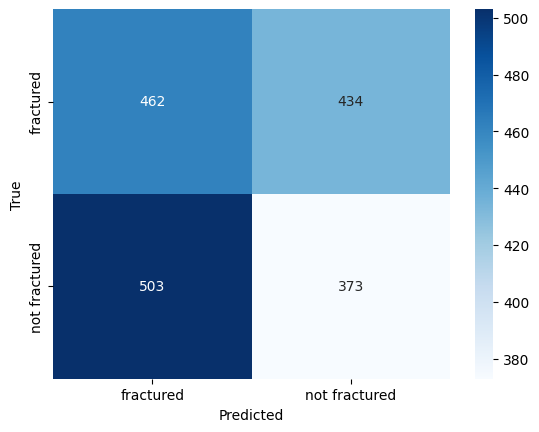

In [26]:
#Inception v3 GoogleNet Model
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import InceptionV3

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_googlenet_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = InceptionV3(input_shape=input_shape,
                             include_top=False,
                             weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def train_model(model, train_generator, validation_generator, epochs=30):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,validation_steps=validation_generator.samples,
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    validation_generator.reset()
    predictions = model.predict(validation_generator)
    y_pred = (predictions > 0.5).astype(int)
    y_true = validation_generator.classes

    print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def main():
    train_dir ='C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//train'
    validation_dir ='C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_googlenet_model()

    epochs = 30
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()
